#### IMPORTACION DE LAS LIBRERIAS NECESARIAS

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error
from sklearn.model_selection import GridSearchCV
from funciones import drop_colum,data_report,limpieza

#### PRIMERA VISUALIZACION

In [65]:
# Importo y visualizo el dataset con el que voy a trabajar
df = pd.read_csv('data/raw/coches-de-segunda-mano-sample.csv')
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [66]:
# Hago primeras visualizaciones rápidas, para ver los datos que tengo dentro del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

#### Limpieza de datos y feature engineering 

In [67]:
# Elimino las columnas que no me son útiles para el futuro modelo

df.drop(['url','company','price_financed','is_professional','dealer','version','country','publish_date','insert_date'],axis=1,inplace=True)

In [32]:
# Implemento una lógica para convertir columnas de tipo object a tipo int/float

fuel = []
    
for i in df['fuel']:
    if i =='Gas natural (CNG)':
        i = 4
        fuel.append(i)
    elif i == 'Gasolina':
        i = 4
        fuel.append(i)
    elif i == 'Híbrido enchufable':
        i = 6
        fuel.append(i)
    elif i == 'Eléctrico' or i == 'Híbrido':
        i = 5
        fuel.append(i)
    elif i == "Diésel":
        i = 3
        fuel.append(i)
    elif i == 'Gas':
        i =2
        fuel.append(i)
    else:
        i = 1
        fuel.append(i)

shift = []
for i in df['shift']:
    if i == 'Manual':
        i = 2 
        shift.append(i)
    elif i == 'Automático':
        i = 3 
        shift.append(i)
    else:
        i = 1
        shift.append(i)


colores = []
for i in df['color']:
    if i == 'Plata':
        i = 1
        colores.append(i)    

    elif i == 'Negro':
        i = 2
        colores.append(i)

    elif i == 'Blanco':
        i = 3
        colores.append(i)

    else:
        i = 4
        colores.append(i)
    
    
marca = []
for i in df['make']:
    if i == "BENTLEY" or i == "FERRARI" or i =="LAMBORGHINI":
        i = 5
        marca.append(i)
    elif i =="ASTON MARTIN" or i =="ALPINE" or i =="PORSCHE" or i=="MASERATI" or i=="TESLA":
        i = 4
        marca.append(i)
    elif i == "CORVETTE" or i=="CUPRA" or i=="LAND-ROVER" or i=="HUMMER" or i=="LOTUS" or i== "ISUZU" or i=="MORGAN" or i=="JAGUAR" or i=="MERCEDES-BENZ":
        i = 3
        marca.append(i)

    elif i == "DS" or i=="LEdfUS" or i=="JEEP" or i=="DFSK" or i=="VOLVO" or i=="BMW" or i=="AUDI" or i=="SUBARU" or i=="INFINIT" or i=="MAdfUS" or i=="ABARTH":
        i = 2
        marca.append(i)
    else:
        i=1
        marca.append(i)

puertas = []
    
for i in df['doors']:
    if i == 4 or i == 5:
        i = 2
        puertas.append(i)
    elif  i == 2:
        i = 3
        puertas.append(i)
    else:
        i = 1
        puertas.append(i)


le = LabelEncoder()
le.fit(df['province'])
df['province'] = le.transform(df['province'])

le = LabelEncoder()
le.fit(df['model'])
df['model'] = le.transform(df['model'])

    
df['make'] = marca
df['shift'] = shift
df['color'] = colores
df['fuel'] = fuel
df['doors'] = puertas

# Sustitución y eliminación de filas con NaN

df['model'].fillna('León',inplace=True)
df['make'].fillna('CITROEN',inplace=True)
df['fuel'].fillna('Gasolina',inplace=True) 
df['year'].fillna(2019,inplace=True)
df = df.dropna(inplace=True)  

In [38]:
# Dataframe preparado para poder empezar a analizarlo y posterior creación de modelos de ML
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41472 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   make      41472 non-null  int64  
 1   model     41472 non-null  int32  
 2   price     41472 non-null  int64  
 3   fuel      41472 non-null  int64  
 4   year      41472 non-null  float64
 5   kms       41472 non-null  int64  
 6   power     41472 non-null  float64
 7   doors     41472 non-null  int64  
 8   shift     41472 non-null  int64  
 9   color     41472 non-null  int64  
 10  photos    41472 non-null  int64  
 11  province  41472 non-null  int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 3.8 MB


In [70]:
# Por último decido renomabrar las columnas para facilitar el entendimiento del dataframe
df.rename(columns={'make':'Marca',
                    'model':'Modelo',
                    'price':'Precio',
                    'fuel':'Tipo_Combustible',
                    'year':'Año',
                    'power':'CV',
                    'doors':'N_Puertas',
                    'shift':'Tipo_Cambio',
                    'photos':'N_Fotos',
                    'province':'Provincia'},inplace=True)



# EDA

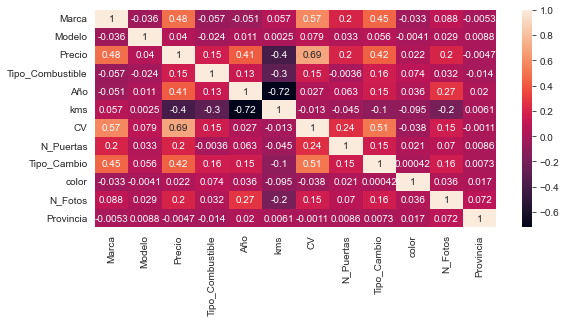

In [40]:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(),annot=True);

He conseguido tener muy buenas correlaciones respecto a la variable target que es precio. Para he tenido que analizar más a fondo algunas features, para poder comprender la correlación con el precio. Para ello realicé las siguientes visualizaciones.

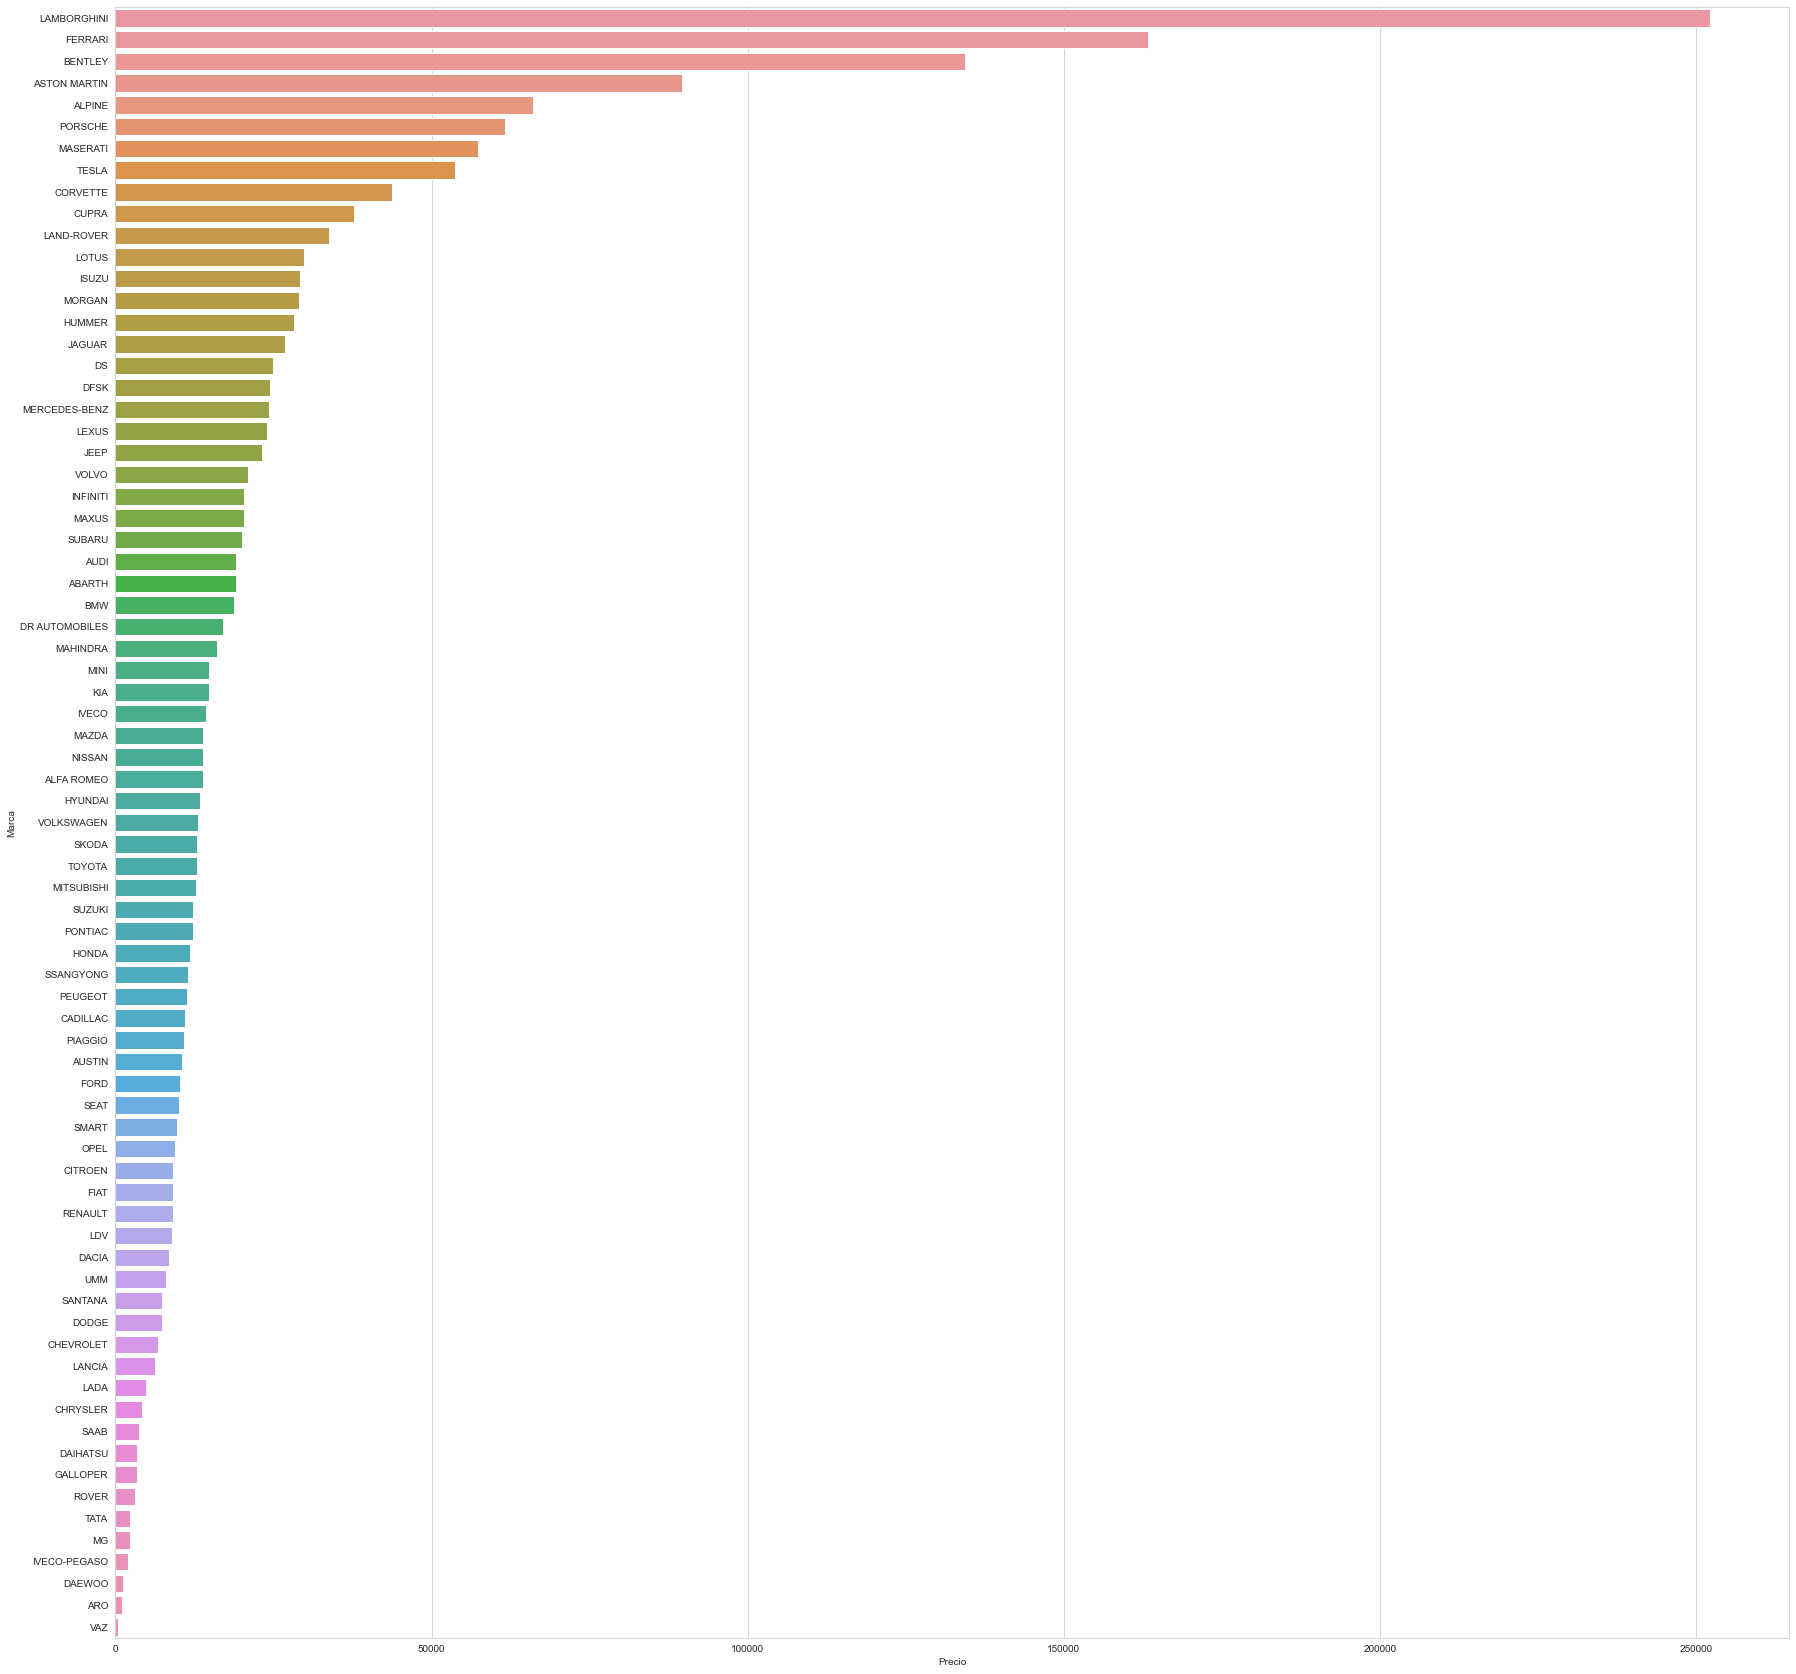

In [50]:
# Primero empecé por la variable marca
p_marcas =df.groupby('Marca',as_index=False)[['Precio']].mean()
p_marcas= p_marcas.sort_values(by='Precio',ascending=False)
plt.figure(figsize=(30,30))
sns.barplot(x='Precio',y='Marca',data=p_marcas);

<AxesSubplot:xlabel='Precio', ylabel='Tipo_Combustible'>

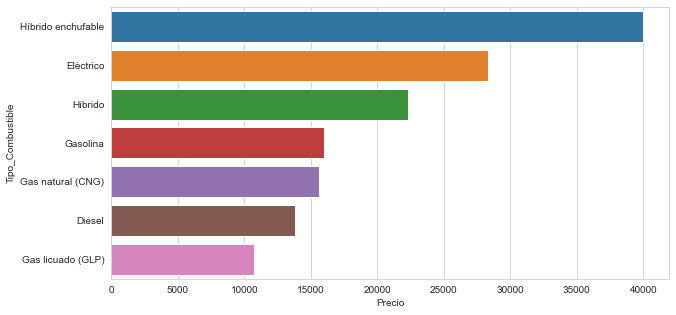

In [53]:
# Lo siguiente analizo más en profundidad es el timpo de combustible
tipo_motor = df.groupby('Tipo_Combustible',as_index=False)[['Precio']].mean()
tipo_motor = tipo_motor.sort_values(by='Precio',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='Precio',y='Tipo_Combustible',data=tipo_motor)

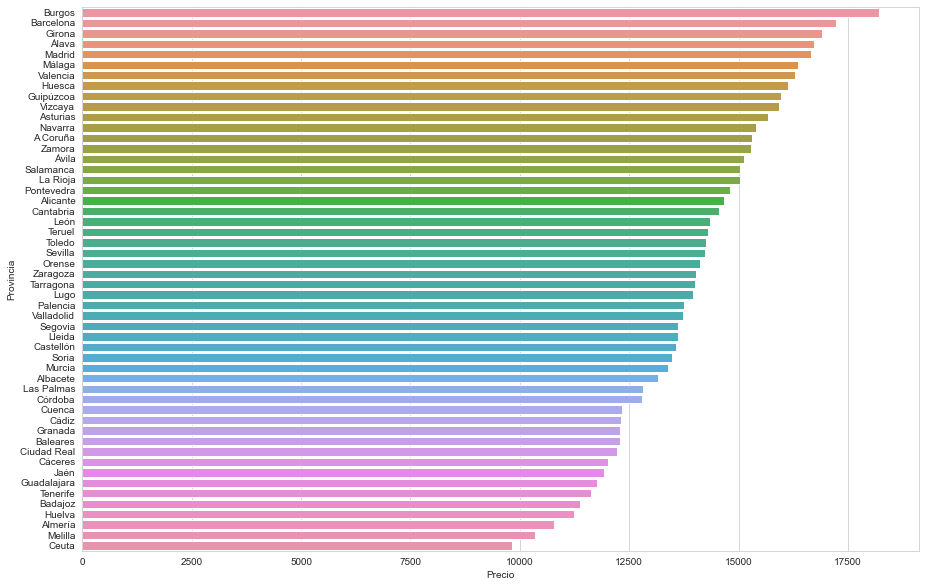

In [55]:
# Analizo la provincia donde se ha publicado el coche que se vende
provincia = df.groupby('Provincia',as_index=False)[['Precio']].mean()
provincia = provincia.sort_values(by='Precio',ascending=False)
provincia.head()
plt.figure(figsize=(15,10))
sns.barplot(x='Precio',y='Provincia',data=provincia);

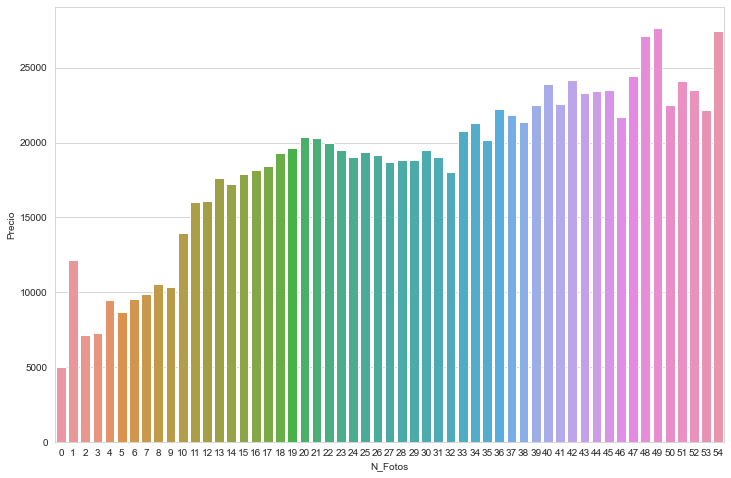

In [57]:
# También analiz el número de fotos que tiene cada anuncio y si tiene relación respecto al precio
n_fotos = df.groupby('N_Fotos',as_index=False)[['Precio']].mean()
n_fotos = n_fotos.sort_values(by='Precio',ascending=False)
n_fotos.head()
plt.figure(figsize=(12,8))
sns.barplot(x='N_Fotos',y='Precio',data=n_fotos);

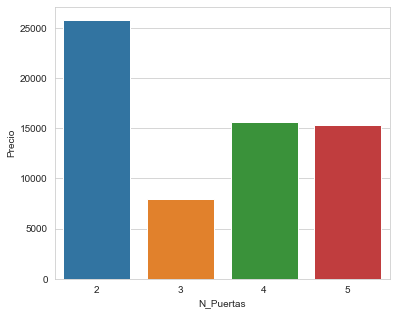

In [59]:
# La siguiente variable a analizar es el número de puertas
n_puertas = df.groupby('N_Puertas',as_index=False)[['Precio']].mean()
n_puertas = n_puertas.sort_values(by='Precio',ascending=False)
n_puertas
plt.figure(figsize=(6,5))
sns.barplot(x='N_Puertas',y='Precio',data=n_puertas);

In [60]:
df.columns

Index(['Marca', 'Modelo', 'Precio', 'Tipo_Combustible', 'Año', 'kms', 'CV',
       'N_Puertas', 'Tipo_Cambio', 'color', 'N_Fotos', 'Provincia'],
      dtype='object')

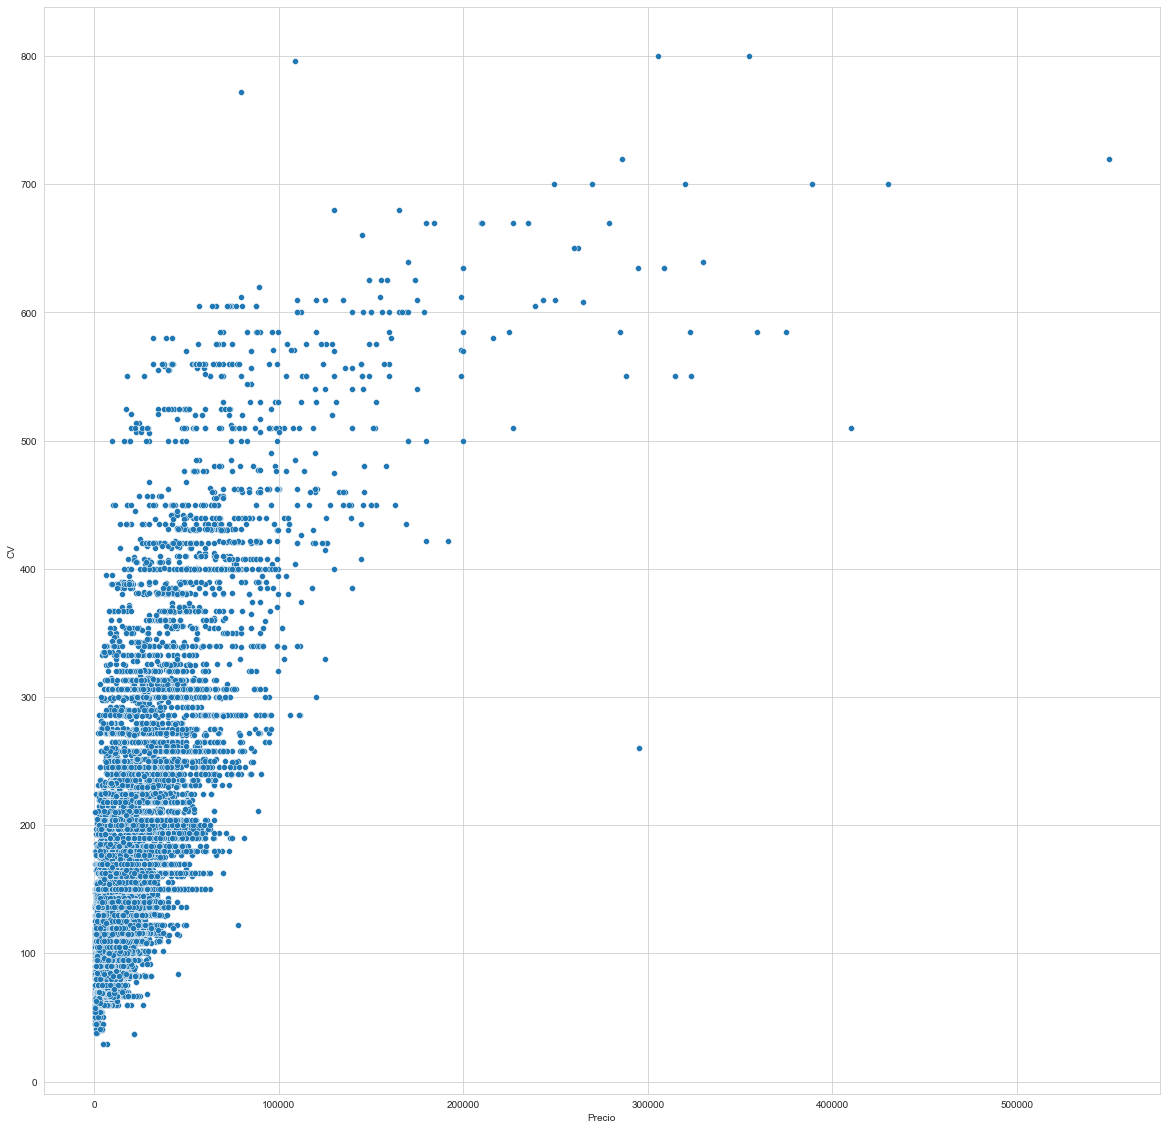

In [61]:
# Por último realizo una visualización de CV respecto al precio, con la que observo una ligera correlación positiva

plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='Precio', y='CV');

In [68]:
limpieza(df)

In [71]:
# Tras estas visualizaciones decido crear una nueva variable con las variables que más correlación tienen
TDG = (df['Marca'] + df['Precio'] - df['kms'] + df['CV']+df['Tipo_Cambio'])/df['Precio']
df['TDG'] = TDG

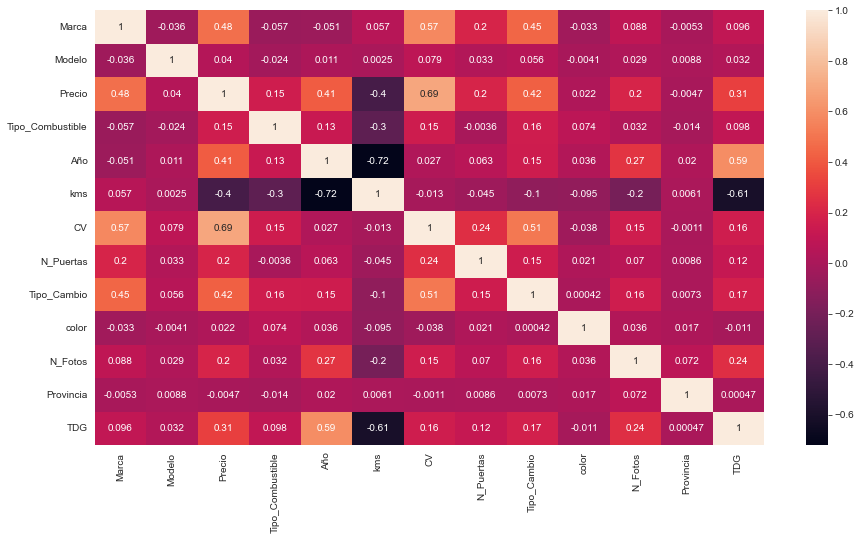

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True);

In [74]:
# Me guardo este dataframe como csv
df.to_csv('data/coches_segunda_mano_ML.csv',index=False)

# Creación, prueba y guardado de modelo de Machine Learning

#### Primero importo todas las librerías necesarias

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error,r2_score,max_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
import xgboost
import pickle
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [77]:
# Vuelvo a leer los datos

df = pd.read_csv('data/processed/coches_segunda_mano_ML.csv')
df.head()

,Marca,Modelo,Precio,Tipo_Combustible,Año,kms,CV,N_Puertas,Tipo_Cambio,color,N_Fotos,Provincia,TDG
0,1,172,6200,4,2017.00,50071,82.00,2,2,3,6,42,-7.06
1,1,814,7851,3,2016.00,103000,100.00,2,2,3,10,7,-12.11
2,1,221,19426,3,2014.00,120000,140.00,2,2,3,9,33,-5.17
3,1,813,22850,3,2017.00,107000,130.00,3,2,3,4,39,-3.68
4,1,40,11490,4,2016.00,78665,130.00,2,2,3,32,29,-5.83


## Divido el DF en train y test

In [78]:
X = df.drop(['Precio'],axis=1)
y = df['Precio']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41472, 12)
(41472,)
(33177, 12)
(8295, 12)
(33177,)
(8295,)


## Linear Regression

In [79]:
reg_mod = LinearRegression()
reg_mod.fit(X_train,y_train)
coef_reg_mod = pd.DataFrame(reg_mod.coef_,
                            X.columns,
                            columns=['Coeficient'])

coef_reg_mod.sort_values('Coeficient', ascending=False)

,Coeficient
Marca,3834.16
Año,804.06
color,320.38
CV,144.54
Modelo,0.18
kms,-0.06
Provincia,-5.12
N_Fotos,-17.27
TDG,-56.53
Tipo_Cambio,-73.14


In [80]:
predictions = reg_mod.predict(X_train)

#### Muestro los resultados tanto en train  como en test. Así me aseguro de no estar en overfitting

In [81]:
MAE = mean_absolute_error(y_train, predictions)
MAPE = mean_absolute_percentage_error(y_train,predictions)
MSE = mean_squared_error(y_train,predictions)
RMSE = np.sqrt(mean_squared_error(y_train,predictions))
RS_SCORE = r2_score(y_train,predictions)
print("MAE: ", MAE)
print("MAPE: ", MAPE.round(2)*100, "%")
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2_Score",RS_SCORE)

MAE:  4585.698659119464
MAPE:  54.0 %
MSE:  83836711.89741418
RMSE:  9156.238960261695
R2_Score 0.6992203562833135


In [82]:
print("test MAE:", mean_absolute_error(y_test, reg_mod.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, reg_mod.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, reg_mod.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, reg_mod.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,reg_mod.predict(X_test)).round(2))  

test MAE: 4768.59
test MAPE: 53.0 %
test MSE: 117283074.77
Test RMSE:10829.7300
RS_SCORE 0.67


In [ ]:
#Guardo el modelo

with open('modelos/otros/lr_model','wb') as archivo_salida:
    pickle.dump(reg_mod,archivo_salida)

## Encontrando el mejor modelo con un Grid Search

In [83]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(reg_mod, parameters, cv=5)
grid.fit(X_train, y_train)


C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

LinearRegression(normalize=False)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.7006571174074228


C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator 

In [84]:
print("El mejor estimator es",grid.best_estimator_)
print("Los mejores parámetros son",grid.best_params_)
print("El mejro score es",grid.best_score_)

El mejor estimator es LinearRegression(normalize=False)
Los mejores parámetros son {'copy_X': True, 'fit_intercept': True, 'normalize': False}
El mejro score es 0.7006571174074228


In [85]:
reg_mod_2 = LinearRegression(copy_X = True, fit_intercept= True, normalize=False)
reg_mod_2.fit(X_train,y_train)
predictions_2 = reg_mod_2.predict(X_train)

C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [87]:
# Muestro de nuevo los resultado en train y test para comprobar si son mejores estos resultados que los anteriores
MAE_2 = mean_absolute_error(y_train, predictions_2)
MAPE_2 = mean_absolute_percentage_error(y_train,predictions_2)
MSE_2 = mean_squared_error(y_train,predictions_2)
RMSE_2 = np.sqrt(mean_squared_error(y_train,predictions_2))
RS_SCORE_2 = r2_score(y_train,predictions_2)
print("train MAE: ", MAE_2)
print("train MAPE: ", MAPE_2.round(2)*100, "%")
print("train MSE: ", MSE_2)
print("train RMSE: ", RMSE_2)
print("train R2_Score",RS_SCORE_2)
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, reg_mod_2.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, reg_mod_2.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, reg_mod_2.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, reg_mod_2.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,reg_mod_2.predict(X_test)).round(2)) 

train MAE:  4585.698659119464
train MAPE:  54.0 %
train MSE:  83836711.89741418
train RMSE:  9156.238960261695
train R2_Score 0.6992203562833135
--------------------------------------------------
test MAE: 4768.59
test MAPE: 53.0 %
test MSE: 117283074.77
Test RMSE:10829.7300
RS_SCORE 0.67


# Polynomial Regression

In [88]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train)
X_poly_train = poly_reg.transform(X_train) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [89]:
predictions_polynomial = pol_reg.predict(X_poly_train)
predictions_polynomial

array([17574.02038854, 12502.6809426 ,  7464.80885143, ...,
       18869.7840265 ,  4635.37571801, -1397.30565997])

In [90]:
MAE_pol = mean_absolute_error(y_train, predictions_polynomial)
MAPE_pol = mean_absolute_percentage_error(y_train,predictions_polynomial)
MSE_pol = mean_squared_error(y_train,predictions_polynomial)
RMSE_pol = np.sqrt(mean_squared_error(y_train,predictions_polynomial))
RS_SCORE_pol = r2_score(y_train,predictions_polynomial)
print("train MAE: ", MAE_pol)
print("train MAPE: ",MAPE_pol*100)
print("train MSE: ", MSE_pol)
print("train RMSE: ", RMSE_pol)
print("train R2_Score",RS_SCORE_pol)
print("-"*50)
poly_reg_test = PolynomialFeatures(degree=4)
poly_reg_test.fit(X_train)
X_poly_test = poly_reg.transform(X_test) 

pol_reg_test = LinearRegression()
pol_reg_test.fit(X_poly_test, y_test)
print("test MAE:", mean_absolute_error(y_test, pol_reg_test.predict(X_poly_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, pol_reg_test.predict(X_poly_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, pol_reg_test.predict(X_poly_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, pol_reg_test.predict(X_poly_test))).round(2))
print('RS_SCORE', r2_score(y_test,pol_reg_test.predict(X_poly_test)).round(2)) 

train MAE:  3452.8543868993956
train MAPE:  37.159355462057
train MSE:  46631811.17479712
train RMSE:  6828.748873314725
train R2_Score 0.8326997894647645
--------------------------------------------------
test MAE: 2987.31
test MAPE: 35.0 %
test MSE: 25979246.74
Test RMSE:5096.9800
RS_SCORE 0.93


In [ ]:
#Guardo el mejor modelo de polynomial

with open('modelos/otros/polynomial_model','wb') as archivo_salida:
    pickle.dump(pol_reg_test,archivo_salida)

## Hago un Gridsearch para ver si consigo un mejor modelo

In [91]:
scorer=make_scorer(mean_squared_error, greater_is_better = False)
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False],}
grid_search1 = GridSearchCV(pol_reg, params, scoring=scorer)
grid_search1.fit(X_poly_train,y_train)

C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\ejgar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [92]:
print("El mejor estimator es",grid_search1.best_estimator_)
print("Los mejores parámetros son",grid_search1.best_params_)
print("El mejor score es",grid_search1.best_score_)

El mejor estimator es LinearRegression(normalize=False)
Los mejores parámetros son {'copy_X': True, 'fit_intercept': True, 'normalize': False}
El mejor score es -21568686313.90991


In [93]:
predictions_pol_grid = grid_search1.predict(X_poly_train)
predictions_pol_grid

array([17574.02038854, 12502.6809426 ,  7464.80885143, ...,
       18869.7840265 ,  4635.37571801, -1397.30565997])

In [94]:
MAE_pol_grid = mean_absolute_error(y_train, predictions_pol_grid)
MAPE_pol_grid = mean_absolute_percentage_error(y_train,predictions_pol_grid)
MSE_pol_grid = mean_squared_error(y_train,predictions_pol_grid)
RMSE_pol_grid = np.sqrt(mean_squared_error(y_train,predictions_pol_grid))
RS_SCORE_pol_grid = r2_score(y_train,predictions_pol_grid)
print("train MAE: ", MAE_pol_grid)
print("train MAPE: ",MAPE_pol_grid)
print("train MSE: ", MSE_pol_grid)
print("train RMSE: ", RMSE_pol_grid)
print("train R2_Score",RS_SCORE_pol_grid)


train MAE:  3452.8543868993956
train MAPE:  0.37159355462057003
train MSE:  46631811.17479712
train RMSE:  6828.748873314725
train R2_Score 0.8326997894647645


## Decision Tree

In [96]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train,y_train)
dtr.feature_importances_

array([8.17636265e-03, 1.59358035e-02, 0.00000000e+00, 4.66674150e-04,
       5.44290915e-03, 5.68175715e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.01802536e-01])

In [97]:
dtr_feature_importance = pd.DataFrame(dtr.feature_importances_,
                            X_train.columns,
                            columns=['Feature Importance'])

dtr_feature_importance.sort_values('Feature Importance', ascending=False)

,Feature Importance
CV,0.57
TDG,0.40
Modelo,0.02
Marca,0.01
kms,0.01
Año,0.00
Tipo_Combustible,0.00
N_Puertas,0.00
Tipo_Cambio,0.00
color,0.00


In [98]:
predictions_dtr = dtr.predict(X_train)
predictions_dtr

array([26445.00532702, 12248.82144831,  8942.66402466, ...,
       19744.47208644,  4068.58078778,  1966.27403846])

In [99]:
MAE_dtr = mean_absolute_error(y_train, predictions_dtr)
MAPE_dtr = mean_absolute_percentage_error(y_train,predictions_dtr)
MSE_dtr = mean_squared_error(y_train,predictions_dtr)
RMSE_dtr = np.sqrt(mean_squared_error(y_train,predictions_dtr))
RS_SCORE_dtr = r2_score(y_train,predictions_dtr)
print("MAE: ", MAE_dtr)
print("MAPE: ",MAPE_dtr)
print("MSE: ", MSE_dtr)
print("RMSE: ", RMSE_dtr)
print("R2_Score",RS_SCORE_dtr)
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, dtr.predict(X_test)))
print("test MAPE:", mean_absolute_percentage_error(y_test, dtr.predict(X_test)))
print("test MSE:", mean_squared_error(y_test, dtr.predict(X_test)))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))
print('RS_SCORE', r2_score(y_test,dtr.predict(X_test)))

MAE:  3462.5845015072646
MAPE:  0.23839335766876343
MSE:  39714403.43513876
RMSE:  6301.936482950202
R2_Score 0.8575172636749102
--------------------------------------------------
test MAE: 3612.530244730324
test MAPE: 0.24041511029530904
test MSE: 50188914.90606719
Test RMSE:7084.4135
RS_SCORE 0.8587991222790399


## Buscando el mejor modelo de Decision Tree

In [100]:
tree = DecisionTreeRegressor()

parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

grid_dtr = GridSearchCV(tree, parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
print("El mejor estimator es",grid.best_estimator_)
print("Los mejores parámetros son",grid.best_params_)
print("El mejor score es",grid.best_score_)

El mejor estimator es LinearRegression(normalize=False)
Los mejores parámetros son {'copy_X': True, 'fit_intercept': True, 'normalize': False}
El mejor score es 0.7006571174074228


In [102]:
predictions_dtr_gs = grid_dtr.predict(X_train)
predictions_dtr_gs

array([20503.08852459, 13460.99456522,  8848.64583333, ...,
       19221.43508772,  5131.81081081,  1191.68604651])

In [103]:
MAE_dtr_gs = mean_absolute_error(y_train, predictions_dtr_gs)
MAPE_dtr_gs = mean_absolute_percentage_error(y_train,predictions_dtr_gs)
MSE_dtr_gs = mean_squared_error(y_train,predictions_dtr_gs)
RMSE_dtr_gs = np.sqrt(mean_squared_error(y_train,predictions_dtr_gs))
RS_SCORE_dtr_gs = r2_score(y_train,predictions_dtr_gs)
print("MAE train: ", MAE_dtr_gs.round(2))
print("MAPE train: ",MAPE_dtr_gs.round(2)*100,"%")
print("MSE train: ", MSE_dtr_gs.round(2))
print("RMSE train: ", RMSE_dtr_gs.round(2))
print("R2_Score train",RS_SCORE_dtr_gs.round(2))
print(""*50)
print("test MAE:", mean_absolute_error(y_test, grid_dtr.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, grid_dtr.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, grid_dtr.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, grid_dtr.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,grid_dtr.predict(X_test)).round(2))

MAE train:  1679.8
MAPE train:  9.0 %
MSE train:  16999273.71
RMSE train:  4123.02
R2_Score train 0.94

test MAE: 1979.23
test MAPE: 10.0 %
test MSE: 35102027.57
Test RMSE:5924.7000
RS_SCORE 0.9


In [ ]:
#Guardo el mejor modelo de Decision Tree. En este caso me quedo con el modelo que he obtenido con el Gridsearch

with open('modelos/otros/DecissionTree_GridSearch_model','wb') as archivo_salida:
    pickle.dump(grid_dtr,archivo_salida)

## KNN

In [105]:
# Para este modelo escalo los datos

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train) 
X_test_scal= scaler.transform(X_test)

# Probé primero Min Max scaler, pero obtuve peores resultados. Así que me quedo con StandarScaler

In [106]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scal,y_train)
predictions_knn = knn.predict(X_train_scal)

In [107]:
MAE_knn = mean_absolute_error(y_train, predictions_knn)
MAPE_knn = mean_absolute_percentage_error(y_train,predictions_knn)
MSE_knn = mean_squared_error(y_train,predictions_knn)
RMSE_knn = np.sqrt(mean_squared_error(y_train,predictions_knn))
RS_SCORE_knn = r2_score(y_train,predictions_knn)
print("train MAE train: ", MAE_knn.round(2))
print("train MAPE train: ",MAPE_knn.round(2)*100,"%")
print("train MSE train: ", MSE_knn.round(2))
print("train RMSE train: ", RMSE_knn.round(2))
print("train R2_Score train",RS_SCORE_knn.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, knn.predict(X_test_scal)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, knn.predict(X_test_scal)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, knn.predict(X_test_scal)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, knn.predict(X_test_scal))).round(2))
print('RS_SCORE', r2_score(y_test,knn.predict(X_test_scal)).round(2))   

train MAE train:  2575.62
train MAPE train:  16.0 %
train MSE train:  32216325.75
train RMSE train:  5675.94
train R2_Score train 0.88
--------------------------------------------------
test MAE: 3236.03
test MAPE: 19.0 %
test MSE: 55980274.91
Test RMSE:7482.0000
RS_SCORE 0.84


In [ ]:
#Guardo el mejor modelo de KNN

with open('modelos/otros/KNN_model','wb') as archivo_salida:
    pickle.dump(knn,archivo_salida)

## Buscando el mejor KNN con Gridsearch CV

In [108]:
params = {"n_neighbors": np.arange(1, 10), 
          "weights": ["uniform", "distance"]}

grid_search_cv_knn = GridSearchCV(knn, params)
grid_search_cv_knn.fit(X_train_scal, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [109]:
print("El mejor estimator es",grid_search_cv_knn.best_estimator_)
print("Los mejores parámetros son",grid_search_cv_knn.best_params_)
print("El mejor score es",grid_search_cv_knn.best_score_)

El mejor estimator es KNeighborsRegressor(n_neighbors=9, weights='distance')
Los mejores parámetros son {'n_neighbors': 9, 'weights': 'distance'}
El mejor score es 0.8358707950007268


In [110]:
knn_gs = KNeighborsRegressor(n_neighbors=7,weights='uniform',leaf_size=50,n_jobs=-1)
knn_gs.fit(X_train_scal,y_train)
predictions_knn_gs = knn_gs.predict(X_train_scal)
# Con los parámetros que me da el gridsearch obtengo un modelo con overfitting. Así que adapto los parámetros manualmente

In [111]:
MAE_knn_gs = mean_absolute_error(y_train, predictions_knn_gs)
MAPE_knn_gs = mean_absolute_percentage_error(y_train,predictions_knn_gs)
MSE_knn_gs = mean_squared_error(y_train,predictions_knn_gs)
RMSE_knn_gs = np.sqrt(mean_squared_error(y_train,predictions_knn_gs))
RS_SCORE_knn_gs = r2_score(y_train,predictions_knn_gs)
print("train MAE train: ", MAE_knn_gs.round(2))
print("train MAPE train: ",MAPE_knn_gs.round(2)*100,"%")
print("train MSE train: ", MSE_knn_gs.round(2))
print("train RMSE train: ", RMSE_knn_gs.round(2))
print("train R2_Score train",RS_SCORE_knn_gs.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, knn_gs.predict(X_test_scal)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, knn_gs.predict(X_test_scal)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, knn_gs.predict(X_test_scal)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, knn_gs.predict(X_test_scal))).round(2))
print('RS_SCORE', r2_score(y_test,knn_gs.predict(X_test_scal)).round(2))  

train MAE train:  2739.8
train MAPE train:  17.0 %
train MSE train:  36515164.64
train RMSE train:  6042.78
train R2_Score train 0.87
--------------------------------------------------
test MAE: 3230.53
test MAPE: 19.0 %
test MSE: 53882272.34
Test RMSE:7340.4500
RS_SCORE 0.85


# SVM

In [112]:
# Para este modelo escalo los datos
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train) 
X_test_scal= scaler.transform(X_test)

# Min max scaler descarto, me da peores resultados

In [113]:
svm = SVR()
svm.fit(X_train_scal,y_train)
predictions_svm = svm.predict(X_train_scal)

In [114]:
MAE_svm = mean_absolute_error(y_train, predictions_svm)
MAPE_svm = mean_absolute_percentage_error(y_train,predictions_svm)
MSE_svm = mean_squared_error(y_train,predictions_svm)
RMSE_svm = np.sqrt(mean_squared_error(y_train,predictions_svm))
RS_SCORE_svm = r2_score(y_train,predictions_svm)
print("train MAE train: ", MAE_svm.round(2))
print("train MAPE train: ",MAPE_svm.round(2)*100,"%")
print("train MSE train: ", MSE_svm.round(2))
print("train RMSE train: ", RMSE_svm.round(2))
print("train R2_Score train",RS_SCORE_svm.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, svm.predict(X_test_scal)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, svm.predict(X_test_scal)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, svm.predict(X_test_scal)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, svm.predict(X_test_scal))).round(2))
print('RS_SCORE', r2_score(y_test,svm.predict(X_test_scal)).round(2))  

train MAE train:  8651.46
train MAPE train:  97.0 %
train MSE train:  268815638.02
train RMSE train:  16395.6
train R2_Score train 0.04
--------------------------------------------------
test MAE: 8951.62
test MAPE: 97.0 %
test MSE: 348100364.87
Test RMSE:18657.4500
RS_SCORE 0.02


## Buscando el mejor modelo SVM con Gridsearch CV

In [115]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train_scal, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [116]:
print("El mejor estimator es",clf.best_estimator_)
print("Los mejores parámetros son",clf.best_params_)
print("El mejor score es",clf.best_score_)

El mejor estimator es SVR(C=10, kernel='linear')
Los mejores parámetros son {'C': 10, 'kernel': 'linear'}
El mejor score es 0.65586633411778


In [117]:
svm_grid = SVR(C=10,kernel='linear')
svm_grid.fit(X_train_scal,y_train)
predictions_svm_grid = svm_grid.predict(X_train_scal)

In [118]:
MAE_svm_grid = mean_absolute_error(y_train, predictions_svm_grid)
MAPE_svm_grid = mean_absolute_percentage_error(y_train,predictions_svm_grid)
MSE_svm_grid = mean_squared_error(y_train,predictions_svm_grid)
RMSE_svm_grid = np.sqrt(mean_squared_error(y_train,predictions_svm_grid))
RS_SCORE_svm_grid = r2_score(y_train,predictions_svm_grid)
print("MAE train: ", MAE_svm_grid.round(2))
print("MAPE train: ",MAPE_svm_grid.round(2)*100,"%")
print("MSE train: ", MSE_svm_grid.round(2))
print("RMSE train: ", RMSE_svm_grid.round(2))
print("R2_Score train",RS_SCORE_svm_grid.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, svm_grid.predict(X_test_scal)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, svm_grid.predict(X_test_scal)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, svm_grid.predict(X_test_scal)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, svm_grid.predict(X_test_scal))).round(2))
print('RS_SCORE', r2_score(y_test,svm_grid.predict(X_test_scal)).round(2))  


MAE train:  4231.66
MAPE train:  42.0 %
MSE train:  96511993.05
RMSE train:  9824.05
R2_Score train 0.65
--------------------------------------------------
test MAE: 4458.96
test MAPE: 41.0 %
test MSE: 141716795.62
Test RMSE:11904.4900
RS_SCORE 0.6


In [ ]:
#Guardo el mejor modelo de SVM

with open('modelos/otros/SVM_GridSearch_model','wb') as archivo_salida:
    pickle.dump(svm_grid,archivo_salida)

# Ensembles

#### Random Forest Regressor

In [119]:
rnd_reg = RandomForestRegressor(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_reg.fit(X_train, y_train)

prections_rnd_reg = rnd_reg.predict(X_train)

In [120]:
MAE_rnd_reg = mean_absolute_error(y_train, prections_rnd_reg)
MAPE_rnd_reg = mean_absolute_percentage_error(y_train,prections_rnd_reg)
MSE_rnd_reg = mean_squared_error(y_train,prections_rnd_reg)
RMSE_rnd_reg = np.sqrt(mean_squared_error(y_train,prections_rnd_reg))
RS_SCORE_rnd_reg = r2_score(y_train,prections_rnd_reg)
print("MAE train: ", MAE_rnd_reg.round(2))
print("MAPE train: ",MAPE_rnd_reg.round(2)*100,"%")
print("MSE train: ", MSE_rnd_reg.round(2))
print("RMSE train: ", RMSE_rnd_reg.round(2))
print("R2_Score train",RS_SCORE_rnd_reg.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, rnd_reg.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, rnd_reg.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, rnd_reg.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, rnd_reg.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,rnd_reg.predict(X_test)).round(2)) 

MAE train:  3609.72
MAPE train:  35.0 %
MSE train:  35116142.54
RMSE train:  5925.89
R2_Score train 0.87
--------------------------------------------------
test MAE: 3728.7
test MAPE: 36.0 %
test MSE: 47247957.27
Test RMSE:6873.7100
RS_SCORE 0.87


## GridSearch Random Forest Regressor

In [121]:
grid_par = {'n_estimators': range(1,10,1),'max_depth':range(1,10,1)}
modelo = RandomForestRegressor()
grid = GridSearchCV(modelo, grid_par,scoring='r2',cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 10)},
             scoring='r2')

In [122]:
print("El mejor estimator es",grid.best_estimator_)
print("Los mejores parámetros son",grid.best_params_)
print("El mejor score es",grid.best_score_)

El mejor estimator es RandomForestRegressor(max_depth=9, n_estimators=9)
Los mejores parámetros son {'max_depth': 9, 'n_estimators': 9}
El mejor score es 0.9247904263112628


In [123]:
grid = RandomForestRegressor(max_depth=9,n_estimators=8)
grid.fit(X_train,y_train)
prections_rnd_reg_grid = grid.predict(X_train)

In [124]:
MAE_rnd_reg_grid = mean_absolute_error(y_train, prections_rnd_reg_grid)
MAPE_rnd_reg_grid = mean_absolute_percentage_error(y_train,prections_rnd_reg_grid)
MSE_rnd_reg_grid = mean_squared_error(y_train,prections_rnd_reg_grid)
RMSE_rnd_reg_grid = np.sqrt(mean_squared_error(y_train,prections_rnd_reg_grid))
RS_SCORE_rnd_reg_grid = r2_score(y_train,prections_rnd_reg_grid)
print("MAE train: ", MAE_rnd_reg_grid.round(2))
print("MAPE train: ",MAPE_rnd_reg_grid.round(2)*100,"%")
print("MSE train: ", MSE_rnd_reg_grid.round(2))
print("RMSE train: ", RMSE_rnd_reg_grid.round(2))
print("R2_Score train",RS_SCORE_rnd_reg_grid.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, grid.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, grid.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, grid.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, grid.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,grid.predict(X_test)).round(2))  

MAE train:  1419.81
MAPE train:  7.000000000000001 %
MSE train:  9806509.28
RMSE train:  3131.53
R2_Score train 0.96
--------------------------------------------------
test MAE: 1660.67
test MAPE: 8.0 %
test MSE: 22526672.96
Test RMSE:4746.2300
RS_SCORE 0.94


In [ ]:
#Guardo el mejor modelo de Random Forest, en este caso el obtenido con el Grid search

with open('modelos/otros/RandomForest_GridSearch_model','wb') as archivo_salida:
    pickle.dump(grid,archivo_salida)

## Ada Boost Regressor

In [125]:
ada_reg = AdaBoostRegressor(n_estimators=200,
                            random_state=42)
ada_reg.fit(X_train, y_train)

predictions_ada_reg = ada_reg.predict(X_train)

In [126]:
MAE_ada_reg = mean_absolute_error(y_train, predictions_ada_reg)
MAPE_ada_reg = mean_absolute_percentage_error(y_train,predictions_ada_reg)
MSE_ada_reg = mean_squared_error(y_train,predictions_ada_reg)
RMSE_ada_reg = np.sqrt(mean_squared_error(y_train,predictions_ada_reg))
RS_SCORE_ada_reg = r2_score(y_train,predictions_ada_reg)
print("MAE train: ", MAE_ada_reg.round(2))
print("MAPE train: ",MAPE_ada_reg.round(2)*100,"%")
print("MSE train: ", MSE_ada_reg.round(2))
print("RMSE train: ", RMSE_ada_reg.round(2))
print("R2_Score train",RS_SCORE_ada_reg.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, ada_reg.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, ada_reg.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, ada_reg.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, ada_reg.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,ada_reg.predict(X_test)).round(2))  

MAE train:  22324.34
MAPE train:  322.0 %
MSE train:  541326925.13
RMSE train:  23266.43
R2_Score train -0.94
--------------------------------------------------
test MAE: 22312.09
test MAPE: 321.0 %
test MSE: 549193816.56
Test RMSE:23434.8800
RS_SCORE -0.55


## GridSearch Ada Boost Regressor

In [127]:
grid_par_ada = {'n_estimators': range(1,10,1),'learning_rate':range(1,10,1)}
modelo_ada = AdaBoostRegressor(random_state=42)
grid_ada = GridSearchCV(modelo_ada, grid_par_ada,scoring='r2',cv=5)
grid_ada.fit(X_train,y_train)
grid_ada = AdaBoostRegressor(learning_rate=2, n_estimators=4,random_state=42)
grid_ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=2, n_estimators=4, random_state=42)

In [128]:
predictions_ada_grid = grid_ada.predict(X_train)

In [131]:
MAE_ada_reg_grid = mean_absolute_error(y_train, predictions_ada_grid)
MAPE_ada_reg_grid = mean_absolute_percentage_error(y_train,predictions_ada_grid)
MSE_ada_reg_grid = mean_squared_error(y_train,predictions_ada_grid)
RMSE_ada_reg_grid = np.sqrt(mean_squared_error(y_train,predictions_ada_grid))
RS_SCORE_ada_reg_grid = r2_score(y_train,predictions_ada_grid)
print("MAE train: ", MAE_ada_reg_grid.round(2))
print("MAPE train: ",MAPE_ada_reg_grid.round(2)*100,"%")
print("MSE train: ", MSE_ada_reg_grid.round(2))
print("RMSE train: ", RMSE_ada_reg_grid.round(2))
print("R2_Score train",RS_SCORE_ada_reg_grid.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, grid_ada.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, grid_ada.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, grid_ada.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, grid_ada.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,grid_ada.predict(X_test)).round(2))

MAE train:  5171.36
MAPE train:  61.0 %
MSE train:  63609363.78
RMSE train:  7975.55
R2_Score train 0.77
--------------------------------------------------
test MAE: 5381.22
test MAPE: 61.0 %
test MSE: 87180701.39
Test RMSE:9337.0600
RS_SCORE 0.75


In [ ]:
#Guardo el mejor modelo de Ada Boost, que en este modelo es el encontrado con el Grid Search

with open('modelos/otros/AdaBoostRegressor_GridSearch_model','wb') as archivo_salida:
    pickle.dump(grid_ada,archivo_salida)

## Gradient Boosting

In [132]:
gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=3, 
                                 learning_rate=1.0,
                                 random_state=42)
gbrt.fit(X_train, y_train)


predictions_gbrt = gbrt.predict(X_train)

In [133]:
MAE_gbrt = mean_absolute_error(y_train, predictions_gbrt)
MAPE_gbrt = mean_absolute_percentage_error(y_train,predictions_gbrt)
MSE_gbrt = mean_squared_error(y_train,predictions_gbrt)
RMSE_gbrt = np.sqrt(mean_squared_error(y_train,predictions_gbrt))
RS_SCORE_gbrt = r2_score(y_train,predictions_gbrt)
print("MAE train: ", MAE_gbrt.round(2))
print("MAPE train: ",MAPE_gbrt.round(2)*100,"%")
print("MSE train: ", MSE_gbrt.round(2))
print("RMSE train: ", RMSE_gbrt.round(2))
print("R2_Score train",RS_SCORE_gbrt.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, gbrt.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, gbrt.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, gbrt.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, gbrt.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,gbrt.predict(X_test)).round(2))  


MAE train:  5566.54
MAPE train:  55.00000000000001 %
MSE train:  76054100.98
RMSE train:  8720.9
R2_Score train 0.73
--------------------------------------------------
test MAE: 5746.74
test MAPE: 56.00000000000001 %
test MSE: 101788663.69
Test RMSE:10089.0400
RS_SCORE 0.71


## Grid Search Gradient Boosting

In [134]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [2, 4, 6],
          'min_samples_split': [2, 4, 6],
          'learning_rate': [0.1, 0.2, 0.3]}


grid_gbrt = GridSearchCV(gbrt, params,scoring='r2')
grid_gbrt.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=1.0, max_depth=2,
                                                 n_estimators=3,
                                                 random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [135]:
print("El mejor estimator es",grid_gbrt.best_estimator_)
print("Los mejores parámetros son",grid_gbrt.best_params_)
print("El mejor score es",grid_gbrt.best_score_)

El mejor estimator es GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=200,
                          random_state=42)
Los mejores parámetros son {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
El mejor score es 0.9625614919287774


In [136]:
gbrt_grid = GradientBoostingRegressor(max_depth=4,
                                 n_estimators=200, 
                                 learning_rate=0.2,
                                 random_state=42,
                                 min_samples_split=2)
gbrt_grid.fit(X_train, y_train)

predictions_gbrt_grid = gbrt_grid.predict(X_train)

In [137]:
MAE_gbrt_grid = mean_absolute_error(y_train, predictions_gbrt_grid)
MAPE_gbrt_grid = mean_absolute_percentage_error(y_train,predictions_gbrt_grid)
MSE_gbrt_grid = mean_squared_error(y_train,predictions_gbrt_grid)
RMSE_gbrt_grid = np.sqrt(mean_squared_error(y_train,predictions_gbrt_grid))
RS_SCORE_gbrt_grid = r2_score(y_train,predictions_gbrt_grid)
print("MAE train: ", MAE_gbrt_grid.round(2))
print("MAPE train: ",MAPE_gbrt_grid.round(2)*100,"%")
print("MSE train: ", MSE_gbrt_grid.round(2))
print("RMSE train: ", RMSE_gbrt_grid.round(2))
print("R2_Score train",RS_SCORE_gbrt_grid.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, gbrt_grid.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, gbrt_grid.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, gbrt_grid.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, gbrt_grid.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,gbrt_grid.predict(X_test)).round(2))  

MAE train:  808.61
MAPE train:  6.0 %
MSE train:  1828236.69
RMSE train:  1352.12
R2_Score train 0.99
--------------------------------------------------
test MAE: 1089.43
test MAPE: 6.0 %
test MSE: 14501098.59
Test RMSE:3808.0300
RS_SCORE 0.96


In [ ]:
#Guardo el mejor modelo de Gradient, que finalmente es mi modelo elegido

with open('modelos/final/my_model','wb') as archivo_salida:
    pickle.dump(gbrt_grid,archivo_salida)

## XGB

In [138]:
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train, y_train)
predictions_xgb = xgb_reg.predict(X_train)

In [139]:
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train.values, y_train)
predictions_xgb = xgb_reg.predict(X_train)

In [140]:
MAE_xgb = mean_absolute_error(y_train, predictions_xgb)
MAPE_xgb = mean_absolute_percentage_error(y_train,predictions_xgb)
MSE_xgb = mean_squared_error(y_train,predictions_xgb)
RMSE_xgb = np.sqrt(mean_squared_error(y_train,predictions_xgb))
RS_SCORE_xgb = r2_score(y_train,predictions_xgb)
print("MAE train: ", MAE_xgb.round(2))
print("MAPE train: ",MAPE_xgb.round(2)*100,"%")
print("MSE train: ", MSE_xgb.round(2))
print("RMSE train: ", RMSE_xgb.round(2))
print("R2_Score train",RS_SCORE_xgb.round(2))
print("-"*50)
print("test MAE:", mean_absolute_error(y_test, xgb_reg.predict(X_test)).round(2))
print("test MAPE:", mean_absolute_percentage_error(y_test, xgb_reg.predict(X_test)).round(2)*100, "%")
print("test MSE:", mean_squared_error(y_test, xgb_reg.predict(X_test)).round(2))
print("Test RMSE:%0.4f"% np.sqrt(mean_squared_error(y_test, xgb_reg.predict(X_test))).round(2))
print('RS_SCORE', r2_score(y_test,xgb_reg.predict(X_test)).round(2)) 

MAE train:  480.94
MAPE train:  4.0 %
MSE train:  565255.12
RMSE train:  751.83
R2_Score train 1.0
--------------------------------------------------
test MAE: 903.96
test MAPE: 5.0 %
test MSE: 17031170.04
Test RMSE:4126.8800
RS_SCORE 0.95


In [ ]:
#Guardo el mejor modelo de xgb

with open('model/xgb_reg','wb') as archivo_salida:
    pickle.dump(xgb_reg,archivo_salida)

## Agrupo los mejores resultados de todos los modelos probados en un dataframe

In [141]:
resultados = {'Métrica':['MAE','MAPE','MSE','RMSE','R2'],
            'Linear_R':[
            mean_absolute_error(y_test, reg_mod_2.predict(X_test)),
            mean_absolute_percentage_error(y_test, reg_mod_2.predict(X_test))*100,
            mean_squared_error(y_test, reg_mod_2.predict(X_test)),
            np.sqrt(mean_squared_error(y_test, reg_mod_2.predict(X_test))),
            r2_score(y_test,reg_mod_2.predict(X_test))],
            'Polynomial_R': [mean_absolute_error(y_test, pol_reg_test.predict(X_poly_test)),
                  mean_absolute_percentage_error(y_test, pol_reg_test.predict(X_poly_test))*100,
                  mean_squared_error(y_test, pol_reg_test.predict(X_poly_test)),
                  np.sqrt(mean_squared_error(y_test, pol_reg_test.predict(X_poly_test))),
                  r2_score(y_test,pol_reg_test.predict(X_poly_test))]
            
            }

resultados = pd.DataFrame(resultados)

resultados['Decision_Tree_Grid'] = [mean_absolute_error(y_test, grid_dtr.predict(X_test)),
                                mean_absolute_percentage_error(y_test, grid_dtr.predict(X_test))*100,
                                mean_squared_error(y_test, grid_dtr.predict(X_test)),
                                np.sqrt(mean_squared_error(y_test, grid_dtr.predict(X_test))),
                                r2_score(y_test,grid_dtr.predict(X_test))

]

resultados['KNN'] = [mean_absolute_error(y_test, knn.predict(X_test_scal)),
                    mean_absolute_percentage_error(y_test, knn.predict(X_test_scal))*100,
                    mean_squared_error(y_test, knn.predict(X_test_scal)),
                    np.sqrt(mean_squared_error(y_test, knn.predict(X_test_scal))),
                    r2_score(y_test,knn.predict(X_test_scal))  
]

resultados['SVM_Grid'] = [mean_absolute_error(y_test, svm_grid.predict(X_test_scal)),
                        mean_absolute_percentage_error(y_test, svm_grid.predict(X_test_scal))*100,
                        mean_squared_error(y_test, svm_grid.predict(X_test_scal)),
                        np.sqrt(mean_squared_error(y_test, svm_grid.predict(X_test_scal))),
                        r2_score(y_test,svm_grid.predict(X_test_scal))
                        ]

resultados['RFR_Grid'] = [mean_absolute_error(y_test, grid.predict(X_test)),
                        mean_absolute_percentage_error(y_test, grid.predict(X_test))*100,
                        mean_squared_error(y_test, grid.predict(X_test)),
                        np.sqrt(mean_squared_error(y_test, grid.predict(X_test))),
                        r2_score(y_test,grid.predict(X_test))
                        ]

resultados['ADA_Boost_Grid'] = [mean_absolute_error(y_test, grid_ada.predict(X_test)),
                                mean_absolute_percentage_error(y_test, grid_ada.predict(X_test))*100,
                                mean_squared_error(y_test, grid_ada.predict(X_test)),
                                np.sqrt(mean_squared_error(y_test, grid_ada.predict(X_test))),
                                r2_score(y_test,grid_ada.predict(X_test))
                                ]

resultados['Gradient_Boosting_Grid'] = [mean_absolute_error(y_test, gbrt_grid.predict(X_test)),
                                        mean_absolute_percentage_error(y_test, gbrt_grid.predict(X_test))*100,
                                        mean_squared_error(y_test, gbrt_grid.predict(X_test)),
                                        np.sqrt(mean_squared_error(y_test, gbrt_grid.predict(X_test))),
                                        r2_score(y_test,gbrt_grid.predict(X_test))]

resultados['xgb_grid'] = [
                    mean_absolute_error(y_test, xgb_reg.predict(X_test)),
                    mean_absolute_percentage_error(y_test, xgb_reg.predict(X_test))*100,
                    mean_squared_error(y_test, xgb_reg.predict(X_test)),
                    np.sqrt(mean_squared_error(y_test, xgb_reg.predict(X_test))),
                    r2_score(y_test,xgb_reg.predict(X_test))
]



resultados

,Métrica,Linear_R,Polynomial_R,Decision_Tree_Grid,KNN,SVM_Grid,RFR_Grid,ADA_Boost_Grid,Gradient_Boosting_Grid,xgb_grid
0,MAE,4768.59,2987.31,1979.23,3236.03,4458.96,1660.67,5381.22,1089.43,903.96
1,MAPE,52.63,35.38,9.94,19.02,40.54,8.39,61.11,6.50,4.54
2,MSE,117283074.77,25979246.74,35102027.57,55980274.91,141716795.62,22526672.96,87180701.39,14501098.59,17031170.04
3,RMSE,10829.73,5096.98,5924.70,7482.00,11904.49,4746.23,9337.06,3808.03,4126.88
4,R2,0.67,0.93,0.90,0.84,0.60,0.94,0.75,0.96,0.95


#### Analizando con otra métrica más (MAX_ERROR), para elegir entre el modelo Gradient Boosting y XGB

In [142]:
r_gradientvsxgb = {'Métrica': ['MAE','MAPE','MSE','RMSE','R2','MAX_ERROR'],
                'Gradient_Boosting_Grid':[mean_absolute_error(y_test, gbrt_grid.predict(X_test)),
                                        mean_absolute_percentage_error(y_test, gbrt_grid.predict(X_test))*100,
                                        mean_squared_error(y_test, gbrt_grid.predict(X_test)),
                                        np.sqrt(mean_squared_error(y_test, gbrt_grid.predict(X_test))),
                                        r2_score(y_test,gbrt_grid.predict(X_test)),
                                        max_error(y_test,gbrt_grid.predict(X_test))

                    
                ]}
r_gradientvsxgb = pd.DataFrame(r_gradientvsxgb)
r_gradientvsxgb['xgb_grid'] = [
                    mean_absolute_error(y_test, xgb_reg.predict(X_test)),
                    mean_absolute_percentage_error(y_test, xgb_reg.predict(X_test))*100,
                    mean_squared_error(y_test, xgb_reg.predict(X_test)),
                    np.sqrt(mean_squared_error(y_test, xgb_reg.predict(X_test))),
                    r2_score(y_test,xgb_reg.predict(X_test)),
                    max_error(y_test,xgb_reg.predict(X_test))
                    ]
r_gradientvsxgb

,Métrica,Gradient_Boosting_Grid,xgb_grid
0,MAE,1089.43,903.96
1,MAPE,6.50,4.54
2,MSE,14501098.59,17031170.04
3,RMSE,3808.03,4126.88
4,R2,0.96,0.95
5,MAX_ERROR,189550.43,194864.88


> Tras analizar ambas métricas con un parámetro más, decido quedarme con Gradient Boosting, ya que los errores máximos son menores. En este caso que nuestro modelo trata de la predicción de precios de venta de coches de segunnda, por lo cual se podría implementar en portales de compra ventas de coches, lo más interesante es que el error máximo sea el menor posible.

In [ ]:
# Guardo el mejor modelo, listo para poner en producción

with open('model/final/my_model','wb') as archivo_salida:
    pickle.dump(gbrt_grid,archivo_salida)